In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import skewnorm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 데이터 읽기
spring = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/두번째 조별과제/spring.csv', header = None)
summer = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/두번째 조별과제/summer.csv', header = None)
fall = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/두번째 조별과제/fall.csv', header = None)
winter = pd.read_csv('C:/Users/wltmd/Downloads/학교/캡스톤/두번째 조별과제/winter.csv', header = None)

# array로 변환
spring = spring.values
summer = summer.values
fall = fall.values
winter = winter.values

# ambient temperature
T_amb_spring = np.zeros([92,24])
for i in range(92):
    for j in range(24):
        T_amb_spring[i,j] = spring[i*24+j,1]

T_amb_summer = np.zeros([92,24])
for i in range(92):
    for j in range(24):
        T_amb_summer[i,j] = summer[i*24+j,1]
        
T_amb_fall = np.zeros([91,24])
for i in range(91):
    for j in range(24):
        T_amb_fall[i,j] = fall[i*24+j,1]
        
T_amb_winter = np.zeros([90,24])
for i in range(90):
    for j in range(24):
        T_amb_winter[i,j] = winter[i*24+j,1]
# # ambient temp graph        
# plt.figure()
# plt.xlabel("day")
# plt.ylabel("Ambient Temperature")
# plt.plot(T_amb_spring)
        
# T_amb_fall = np.zeros([91,24])
# for i in range(91):
#     for j in range(24):
#         T_amb_fall[i,j] = fall[i*24+j,1]

# irradiance
S_spring = np.zeros([92,24])
for i in range(92):
    for j in range(24):
        try:
            S_spring[i,j] = 10**6*spring[24*i+j,3]/3600
        except ZeroDivisionError as e:
            S_spring[i,j] = 0    

S_summer = np.zeros([92,24])
for i in range(92):
    for j in range(24):
        try:
            S_summer[i,j] = 10**6*summer[24*i+j,3]/3600
        except ZeroDivisionError as e:
            S_summer[i,j] = 0   

S_fall = np.zeros([91,24])
for i in range(91):
    for j in range(24):
        try:
            S_fall[i,j] = 10**6*fall[24*i+j,3]/3600
        except ZeroDivisionError as e:
            S_fall[i,j] = 0

S_winter = np.zeros([90,24])
for i in range(90):
    for j in range(24):
        try:
            S_winter[i,j] = 10**6*winter[24*i+j,3]/3600
        except ZeroDivisionError as e:
            S_winter[i,j] = 0
            
# S_spring = pd.DataFrame(S_spring)
# S_spring.to_csv("irradiance.csv", header = False, index = False)

S_spring = 0.001*S_spring
S_summer = 0.001*S_summer
S_fall = 0.001*S_fall
S_winter = 0.001*S_winter
# # irradiance graph
# plt.figure()
# plt.xlabel("hour")
# plt.ylabel("Irradiance")
# plt.plot(S_spring.T)

NOCT = 44 # operating cell temperature
P_max = 263 # the max
cell_dim = 161.7**2*10**(-6)
# S_spring = S_spring*cell_dim
np.nan_to_num(S_spring, copy=False) # nan값을 0으로 바꾸기
np.nan_to_num(S_summer, copy=False)
np.nan_to_num(S_fall, copy=False)
np.nan_to_num(S_winter, copy=False)

# cell temperature
T_cell_spring = np.zeros([92,24])
for i in range(92):
    for j in range(24):
        T_cell_spring[i,j] = T_amb_spring[i,j] + (NOCT-20)*S_spring[i,j]/0.8

T_cell_summer = np.zeros([92,24])
for i in range(92):
    for j in range(24):
        T_cell_summer[i,j] = T_amb_summer[i,j] + (NOCT-20)*S_summer[i,j]/0.8
        
T_cell_fall = np.zeros([91,24])
for i in range(91):
    for j in range(24):
        T_cell_fall[i,j] = T_amb_fall[i,j] + (NOCT-20)*S_fall[i,j]/0.8

T_cell_winter = np.zeros([90,24])
for i in range(90):
    for j in range(24):
        T_cell_winter[i,j] = T_amb_winter[i,j] + (NOCT-20)*S_winter[i,j]/0.8
        
# cell temperature(or irradiance) 값에 문제가 있어!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# cell temp에 문제 있는 것이 아니라 S(irradiance)에서 일조시간을 나눠주지 않으면 됨.
# T_cell_spring = pd.DataFrame(T_cell_spring)
# T_cell_spring.to_csv("cell_temp.csv", header = False, index = False)
# -----------------------------------------------------------------------------
# T_cell_fall = np.zeros([91,24])
# for i in range(91):
#     for j in range(24):
#         T_cell_fall[i,j] = T_amb_fall[i,j] + (NOCT-20)*S_fall[i,j]/0.8
        
P_ac_spring = 1000*P_max*(S_spring/1000)*(1-0.005*(T_cell_spring-25))
P_ac_summer = 1000*P_max*(S_summer/1000)*(1-0.005*(T_cell_summer-25))
P_ac_fall = 1000*P_max*(S_fall/1000)*(1-0.005*(T_cell_fall-25))
P_ac_winter = 1000*P_max*(S_winter/1000)*(1-0.005*(T_cell_winter-25))

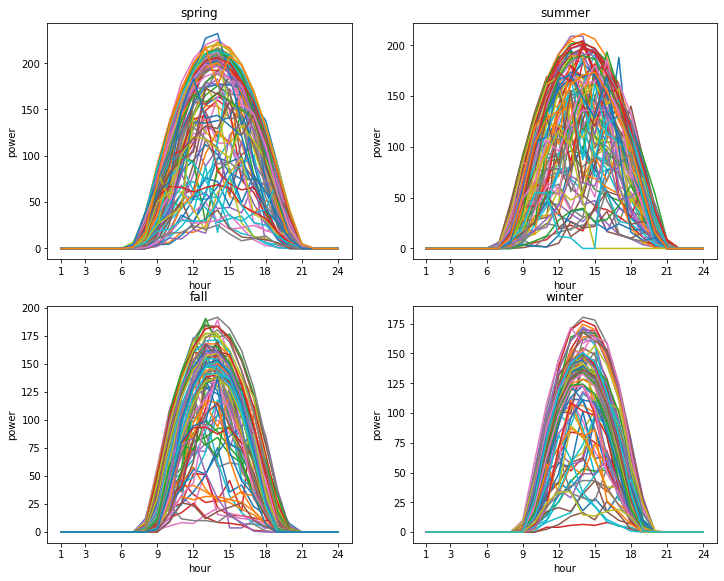

In [2]:
# a = 0
# b = 92*24
# for i in range(92):
#     for j in range(24):
#         if P_ac_spring[i,j] > 263:
#             print(".")
#         else:
#             a+=1
# a,b

# graph
x = np.arange(1,25)
x1 = [1,3,6,9,12,15,18,21,24]
plt.figure(figsize=(12,20))
plt.subplot(421)
plt.title("spring")
plt.xticks(x1)
plt.xlabel("hour")
plt.ylabel("power")
plt.plot(x, P_ac_spring.T);
plt.subplot(422)
plt.title("summer")
plt.xticks(x1)
plt.xlabel("hour")
plt.ylabel("power")
plt.plot(x, P_ac_summer.T);
plt.subplot(423)
plt.title("fall")
plt.xticks(x1)
plt.xlabel("hour")
plt.ylabel("power")
plt.plot(x, P_ac_fall.T);
plt.subplot(424)
plt.title("winter")
plt.xticks(x1)
plt.xlabel("hour")
plt.ylabel("power")
plt.plot(x, P_ac_winter.T);

In [3]:
## 전체 그래프 구하기
# x2 = np.arange(1,25)
# x3 = np.arange(1,25)
# x4 = np.arange(1,25)
# x5 = np.arange(1,25)
# plt.figure(figsize=(10,10))
# plt.xticks(x1)
# plt.plot(x2, P_ac_spring.T, x3, P_ac_summer.T, x4, P_ac_fall.T, x5, P_ac_winter.T);

# 계절별 P_ac값을 하나의 데이터로 변환
P_ac = np.concatenate((P_ac_spring,P_ac_summer,P_ac_fall,P_ac_winter), axis=0)

# # plt.figure(figsize=(10,10))
# # plt.xticks(x1)
# # plt.plot(x, P_ac.T);

# kmeans labeling 추정
# kmeans = KMeans(n_clusters = 5, random_state = 0).fit(P_ac)
# kmeans.predict(P_ac)

In [15]:
def SSE(k):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(P_ac) # cluster 수를 k로 한 kmeans를 적용
    clu_dis = np.zeros([k]) #cluster 수에 따른 영행렬 생성 / 각 행 별로 대표값과 데이터값의 차이의 제곱값을 더해준다.
    for i in range(k): # i번째 cluster, 0 ~ k-1 반복
        for j in range(365): # 365개 데이터 읽기
            if kmeans.labels_[j] == i: #j번째 데이터가 i번째 클러스터label를 가졌을 때
                clu_dis[i] += sum(abs(kmeans.cluster_centers_[i,:] - P_ac[j,:])) #i번째 클러스터 중심값과 데이터 차의 제곱을 i번째 행렬에 추가
            else:
                clu_dis = clu_dis
    return sum(clu_dis) # cluster수에 따라 생성된 모든 값들을 더한다.

def L_SSE(n):
    L_SSE = SSE(n-1) + SSE(n+1) - 2*SSE(n)    
    return L_SSE

In [11]:
# # inertia 로 표현
# def SSE(k):
#     SSE = 0
#     kmeans = KMeans(n_clusters = k, random_state = 0).fit(P_ac)
#     SSE += kmeans.inertia_
#     return SSE

# def L_SSE(n):
#     L_SSE = SSE(n-1) + SSE(n+1) - 2*SSE(n)    
#     return L_SSE

# # df = pd.DataFrame(P_ac)
# # df.to_csv("P_ac.csv", header = None, index = None)

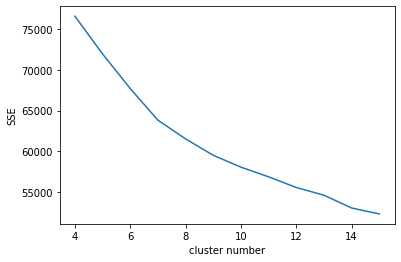

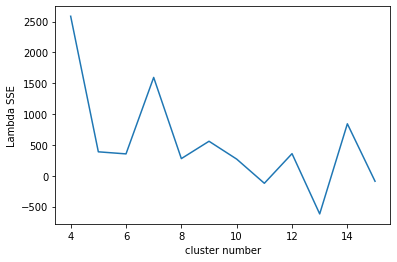

In [16]:
SSE
x = np.arange(4,16)
y = np.array([SSE(4),SSE(5),SSE(6),SSE(7),SSE(8),SSE(9),SSE(10),SSE(11),SSE(12),SSE(13),SSE(14),SSE(15)])
plt.figure()
plt.xlabel("cluster number")
plt.ylabel("SSE")
plt.plot(x, y);

# Lambda SSE
x = np.array(range(4,16))
y = np.array([L_SSE(4),L_SSE(5),L_SSE(6),L_SSE(7),L_SSE(8),L_SSE(9),L_SSE(10),L_SSE(11),L_SSE(12),L_SSE(13),L_SSE(14),L_SSE(15)])
plt.figure()
plt.xlabel("cluster number")
plt.ylabel("Lambda SSE")
plt.plot(x, y);

# -------------------------------------------------------------------------------------------------
# def SSE(k):
#     kmeans = KMeans(n_clusters = k, random_state = 0).fit(P_ac) # cluster 수를 k로 한 kmeans를 적용
#     clu_dis = np.zeros([k]) #cluster 수에 따른 영행렬 생성
#     for i in range(k): # i번째 cluster, 0 ~ k-1 반복
#         clu_dis[i] = sum(sum((kmeans.cluster_centers_[i,:] - P_ac[kmeans.labels_ == i])**2)) #i번째 클러스터 중심값 과 데이터 차의 제곱을 i번째 행렬에 추가
#         clu_dis[i] = (clu_dis[i])**0.5 #i번째 행렬의 수의 제곱근
#     return sum(clu_dis) # cluster수에 따라 생성된 모든 값들을 더한다.

# def L_SSE(n):
#     L_SSE = SSE(n-1) + SSE(n+1) - 2*SSE(n)    
#     return L_SSE
# -------------------------------------------------------------------------------------------------
# SSE(8)

# SSE
# x = np.arange(1,16)
# x.()
# y = np.array([SSE(:)])
# y = np.array()
# plt.figure()
# plt.xlabel("cluster number")
# plt.ylabel("SSE")
# plt.plot(x, y);

In [72]:
# # Lambda SSE
# x = np.array(range(5,16))
# y = np.array([L_SSE(5),L_SSE(6),L_SSE(7),L_SSE(8),L_SSE(9),L_SSE(10),L_SSE(11),L_SSE(12),L_SSE(13),L_SSE(14),L_SSE(15)])
# plt.figure()
# plt.xlabel("cluster number")
# plt.ylabel("Lambda SSE")
# plt.plot(x, y);

# n_cluster = range(5,16)
# SSE1 = np.zeros([11,1])

# for i in n_cluster:
#     kmeans = KMeans(n_clusters =i, random_state = 0).fit(P_ac)
#     for j in range(i):
#         for k in range(365):
#             if kmeans.predict(P_ac)[k] == j:
#                 SSE1[i-5,0] += (kmeans.cluster_centers_[j,:] - P_ac[k,:])**2
#             else:
#                 SSE1 = SSE1
#         SSE1[j] = (SSE1[j])**0.5
#     SSE2[i] = sum(SSE1)

# SSE2
# plt.figure()
# plt.plot(SSE)

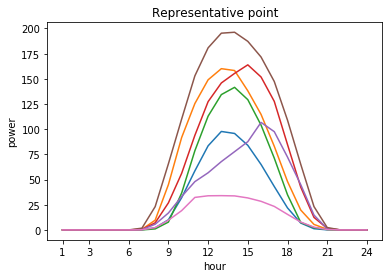

In [5]:
kmeans = KMeans(n_clusters = 7, random_state = 0).fit(P_ac)
center = kmeans.cluster_centers_
x = np.arange(1,25)
plt.figure()
plt.title("Representative point")
plt.xticks(x1)
plt.xlabel("hour")
plt.ylabel("power")
plt.plot(x, center.T);

In [64]:
# n_cluster = range(5,16)
# SSE1 = np.zeros([16,1])
# SSE2 = np.zeros([11,1])

# for i in n_cluster: # i = cluster 수 / i가 증가함에 따라 cluster number는 증가.
#     kmeans = KMeans(n_clusters =i, random_state = 0).fit(P_ac) # i(cluster number)인 kmeans를 먼저 정의한다.
#     for j in range(i): # 클러스터수 만큼 반복한다.(0~) / j label 클러스터
#         for k in range(365): # 행(365) 데이터 읽기 / 조건문을 사용하여 cluster 별로 구분하고 계산.
#             if kmeans.labels_[k] == j: # k행이 j(0~클러스터수)label 클러스터라면,
#                 SSE1[i-5,0] += sum((kmeans.cluster_centers_[j,:] - P_ac[k,:])**2) # 오차 제곱의 합
#             else:
#                 SSE1 = SSE1 # 조건에 맞지 않는 경우 값은 동일
#         SSE1[j] = (SSE1[j])**0.5 # j label 클러스터에서 
#     SSE2[i-5] = sum(SSE1)/i

# SSE2
# xc = np.array([range(5,16)])
# plt.figure()
# plt.plot(xc.T, SSE2);